In [58]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from scipy import interpolate

In [59]:
m = 4

eps = 1
omega = 1
T = 1e9

buk_vis = 6.0*10**(-59) * eps**2 * omega**(-2) * T**6
shear_vis = 347 * eps**(9/4) * T**(-2)


In [85]:
def freq_omega(Omega): # eigen frequency
    
    return 1

def alpha_m(m,M,R,period=0): # period is in unit second
    if period == 0:
        return 1
    else:
        # (piGrho) 3/4* gravitational constant in solar mass^-1*km^3*sec^-2 = 9.95e10
        unit = (9.95e10*(M/R**3))**(-0.5) # in solar mass and km
        template = np.genfromtxt("./Constant/alpha%s.txt"%m,names=('x,y'))
        f = interpolate.interp1d(template['x'], template['y'])

        freq = (2*np.pi/period)*(unit)
        if freq > 0.65:
            freq = 0.65

        am = f(freq)
        return round(np.float(am),5)
#         return 1

def gamma_m(m,M,R,period=0): # period is in unit second
    if period == 0:
        return 1
    else:
        unit = (9.95e10*(M/R**3))**(-0.5) # in solar mass and km
        template = np.genfromtxt("./Constant/gamma%s.txt"%m,names=('x,y'))
        f = interpolate.interp1d(template['x'], template['y'])

        freq = (2*np.pi/period)*(unit)
        if freq > 0.65:
            freq = 0.65

        gm = f(freq)

        return round(np.float(gm),5)
    
def epslion_m(m):
    return 1


def omega_m(m,M,R): # mass and radius (equation 16.70)
    col1 = 2*m*(m - 1)/(2*m + 1)
    col2 = 6.67e-20*M*2e30/R**3
    om = np.sqrt(col1 * col2)
    return om

In [172]:
def doublefactorial(n): 
    if (n == 0 or n == 1): 
        return 1; 
    return n * doublefactorial(n - 2);


def tau_GR_m(m,M,R): # m >= 0, mass, radius
    col1 = ( (m-1) * (doublefactorial(2*m+1))**2 ) / ( (m+1) * (m+2) )
    col2 = ( (2*m + 1) / (2*m*(m-1)) )**m
    col3 = 2/3 * (R/(M*1.48))**(m+1) * R/3e5
    tGRm = col1 * col2 * col3
    return tGRm

def tau_nu_m(m,R,nu): # radius (km), shear viscosity timescale (equaiton 16.72)
    tnum = (R*1e5)**2 / ((2*m+1)*(m-1)) / nu
    return tnum

def tau_zeta_m(m,M,R,zeta): # mass(sun mass) radius (km)
    rho = 3*M*1.98843e33/(4*np.pi*(R*1e5)**3) # gram cm^-3
    tzetam = (0.5*(3/5)**4*(m**3/(2*m+3))*zeta/(rho*R**2))**(-1)
    return tzetam

tau_GR_m(2,1.4,12),tau_nu_m(2,12,0.01),tau_zeta_m(2,1.4,12,5e18)

(0.1517625150807423, 28800000000000.0, 0.14956553540816606)

In [173]:
def Omega_GRR(m,M,R,nu=0,zeta=0,O=0): # mass, radius, shear viscosity, bulk viscosity, initial frequency
    col1 = omega_m(m,M,R)/m
    col2 = alpha_m(m,M,R,O) 
    col_25 = tau_GR_m(m,M,R)/tau_nu_m(m,R,nu) + tau_GR_m(m,M,R)/tau_zeta_m(m,M,R,zeta)*epslion_m(m)
    col3 = gamma_m(m,M,R,O) * (col_25)**(1/(2*m+1))
    GRR = col1 * (col2 + col3)
    return GRR

def self_con_Omega_GRR(m,M,R,nu=0,zeta=0,O=0):
    period = []
    for i in range(30):
        O = 2*np.pi/Omega_GRR(m,M,R,nu,zeta,O)
        period.append(O)
#     plt.figure(figsize=(10,5))
#     plt.plot(period)
#     plt.show()
    final_p = 0.5*(period[-1]+period[-2])
    return np.round(final_p,7) # in unit second

self_con_Omega_GRR(5,1.4,13,0.01,0.01)

0.001511

1.1439


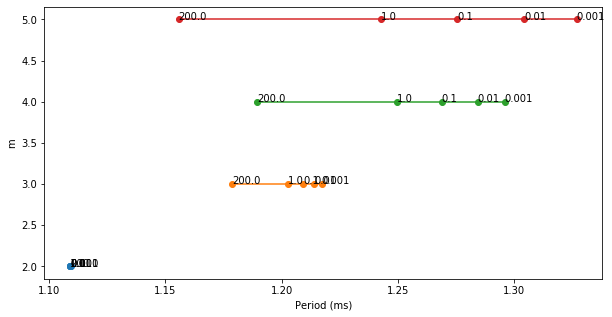

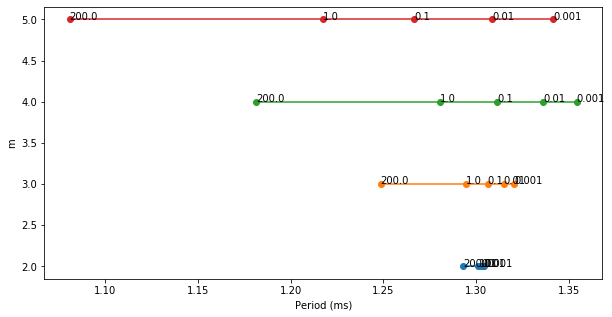

In [174]:
sv = np.array([200,1,0.1,0.01,0.001])
# sv = np.array([2e3,2e5,2e7,2e9,2e11])
y = self_con_Omega_GRR(3,1.3,11,0.01,0.01,0)*1000
print(y)

mass = 1.5
radius = 12
plt.figure(figsize=(10,5))
for m in range(2,6):
    y = []
    for x in sv:
        y.append(self_con_Omega_GRR(m,mass,radius,x,1000)*1000)
        plt.annotate(x,(y[-1],m))
    plt.plot(y,[m,m,m,m,m],'o-')
plt.xlabel('Period (ms)')
plt.ylabel('m')
# plt.xlim(1,1.5)
plt.show()

plt.figure(figsize=(10,5))
for m in range(2,6):
    y = []
    for x in sv:
        y.append(2*np.pi/Omega_GRR(m,mass,radius,x,1000)*1000)
        plt.annotate(x,(y[-1],m))
    plt.plot(y,[m,m,m,m,m],'o-')
plt.xlabel('Period (ms)')
plt.ylabel('m')
# plt.xlim(1,1.5)
plt.show()

In [175]:
basedir = "/Users/laote/sdsu/Research/rotation"
twindir = basedir + "/EOS_twin"

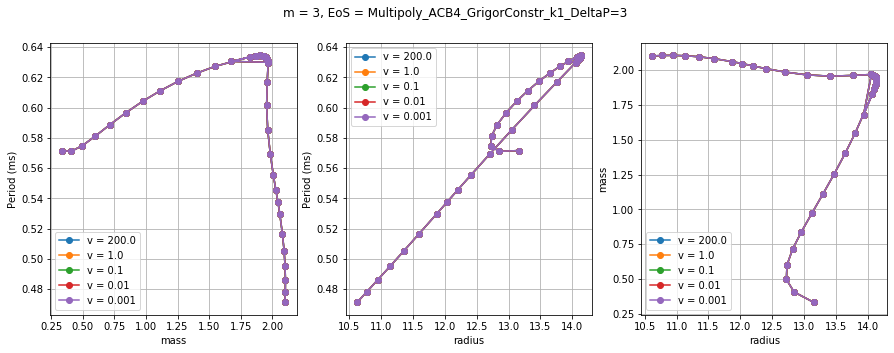

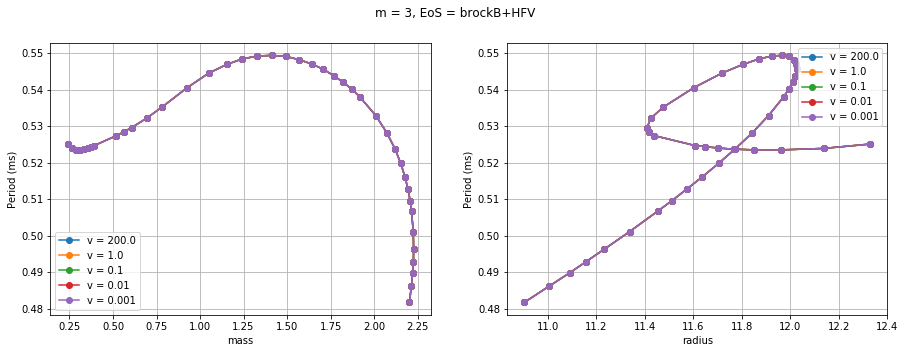

In [176]:
i = 3
datadir = twindir + "/%s.dat" %(i)
dataHT2 = np.genfromtxt(datadir,skip_header=649, skip_footer=1028-710,\
                        names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')
NSdir = twindir + "/brockB+HFV.dat"
NSHT2 = np.genfromtxt(NSdir,skip_header=649, skip_footer=1028-710,\
                        names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')


M_gr = dataHT2['M_gr']
R = dataHT2['R_km']

NSM_gr = NSHT2['M_gr']
NSR = NSHT2['R_km']


plt.figure(figsize=(15,5))
plt.suptitle('m = 3, EoS = Multipoly_ACB4_GrigorConstr_k1_DeltaP=3')
plt.subplot(131)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(3,M_gr[i],R[i],bb,5e18)*1000)
    plt.plot(M_gr,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(132)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(3,M_gr[i],R[i],bb,5e18)*1000)
    plt.plot(R,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.subplot(133)
for bb in sv:
    plt.plot(R,M_gr,'o-',label = 'v = %s' %bb)
plt.ylabel('mass')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(15,5))
plt.suptitle('m = 3, EoS = brockB+HFV')
plt.subplot(121)
for bb in sv:
    period = []
    for i in range(len(NSM_gr)):
        period.append(self_con_Omega_GRR(3,NSM_gr[i],NSR[i],bb,5e18)*1000)
    plt.plot(NSM_gr,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(122)
for bb in sv:
    period = []
    for i in range(len(NSM_gr)):
        period.append(self_con_Omega_GRR(3,NSM_gr[i],NSR[i],bb,5e18)*1000)
    plt.plot(NSR,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()

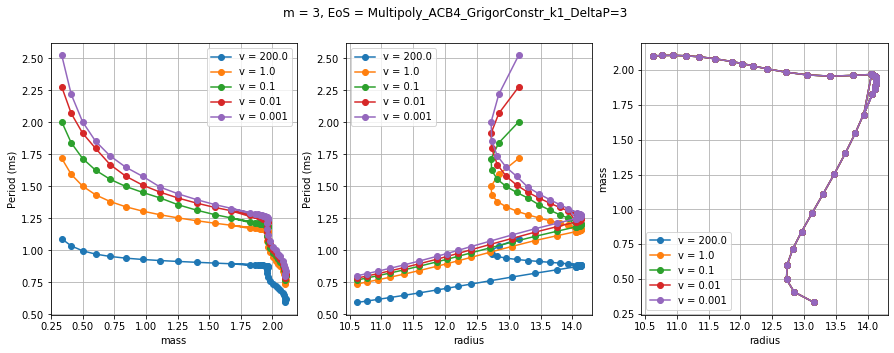

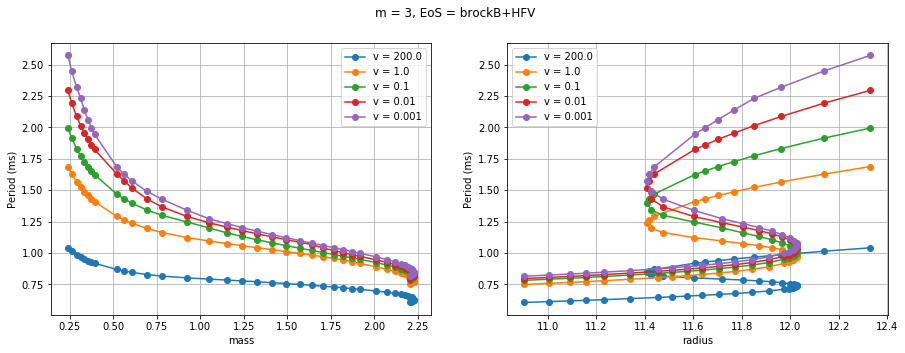

In [46]:
i = 3
datadir = twindir + "/%s.dat" %(i)
dataHT2 = np.genfromtxt(datadir,skip_header=649, skip_footer=1028-710,\
                        names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')
NSdir = twindir + "/brockB+HFV.dat"
NSHT2 = np.genfromtxt(NSdir,skip_header=649, skip_footer=1028-710,\
                        names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')


M_gr = dataHT2['M_gr']
R = dataHT2['R_km']

NSM_gr = NSHT2['M_gr']
NSR = NSHT2['R_km']


plt.figure(figsize=(15,5))
plt.suptitle('m = 3, EoS = Multipoly_ACB4_GrigorConstr_k1_DeltaP=3')
plt.subplot(131)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(3,M_gr[i],R[i],bb,bb)*1000)
    plt.plot(M_gr,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(132)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(3,M_gr[i],R[i],bb,bb)*1000)
    plt.plot(R,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.subplot(133)
for bb in sv:
    plt.plot(R,M_gr,'o-',label = 'v = %s' %bb)
plt.ylabel('mass')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(15,5))
plt.suptitle('m = 3, EoS = brockB+HFV')
plt.subplot(121)
for bb in sv:
    period = []
    for i in range(len(NSM_gr)):
        period.append(self_con_Omega_GRR(3,NSM_gr[i],NSR[i],bb,bb)*1000)
    plt.plot(NSM_gr,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(122)
for bb in sv:
    period = []
    for i in range(len(NSM_gr)):
        period.append(self_con_Omega_GRR(3,NSM_gr[i],NSR[i],bb,bb)*1000)
    plt.plot(NSR,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()

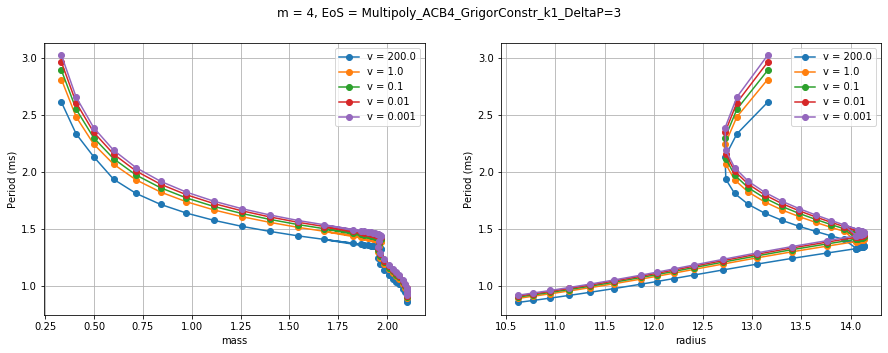

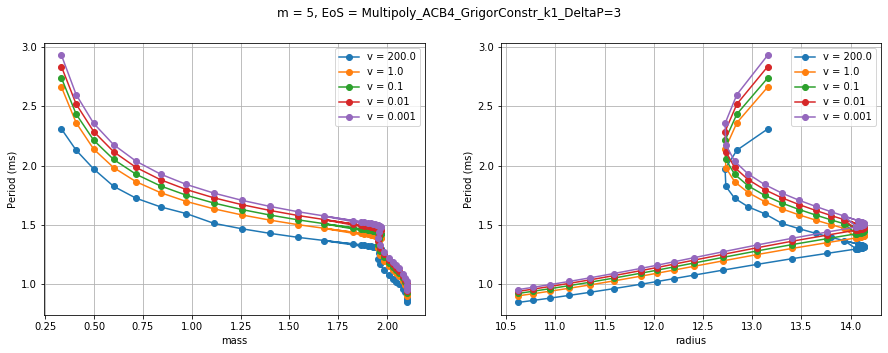

In [47]:
M_gr = dataHT2['M_gr']
R = dataHT2['R_km']

NSM_gr = NSHT2['M_gr']
NSR = NSHT2['R_km']


plt.figure(figsize=(15,5))
plt.suptitle('m = 4, EoS = Multipoly_ACB4_GrigorConstr_k1_DeltaP=3')
plt.subplot(121)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(4,M_gr[i],R[i],bb,6e-59)*1000)
    plt.plot(M_gr,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(122)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(4,M_gr[i],R[i],bb,6e-59)*1000)
    plt.plot(R,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()


plt.figure(figsize=(15,5))
plt.suptitle('m = 5, EoS = Multipoly_ACB4_GrigorConstr_k1_DeltaP=3')
plt.subplot(121)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(5,M_gr[i],R[i],bb,6e-59)*1000)
    plt.plot(M_gr,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(122)
for bb in sv:
    period = []
    for i in range(len(M_gr)):
        period.append(self_con_Omega_GRR(5,M_gr[i],R[i],bb,6e-59)*1000)
    plt.plot(R,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()

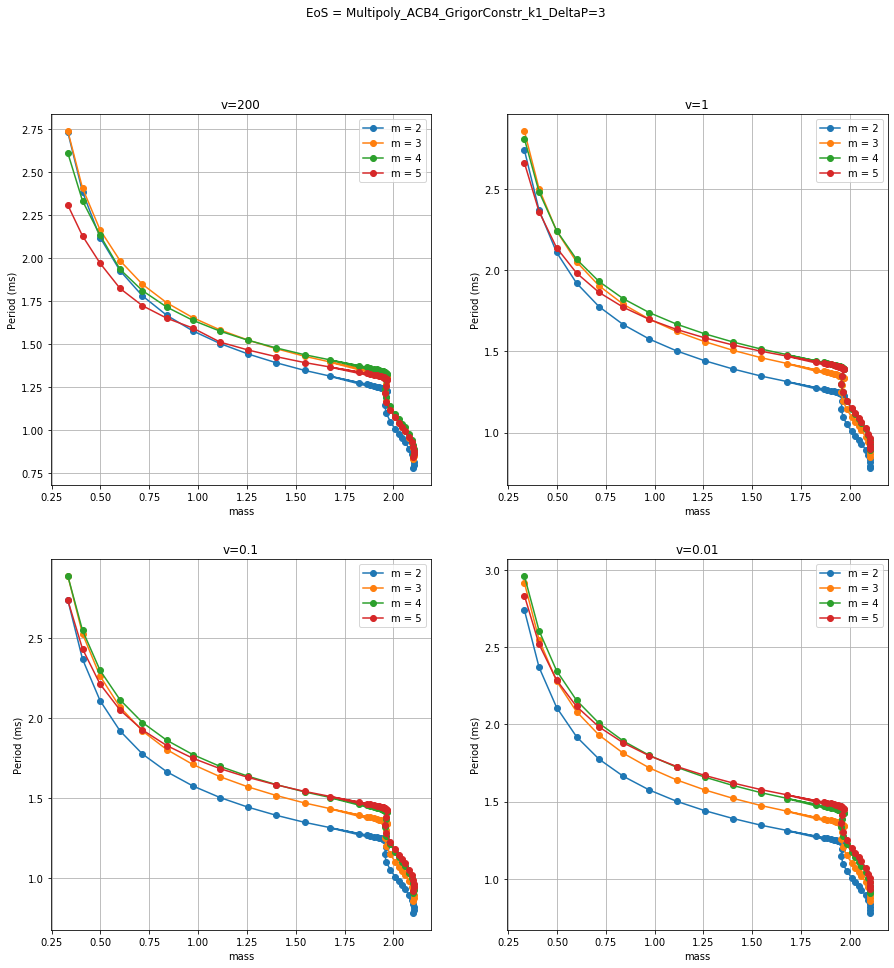

In [162]:
i = 3
datadir = twindir + "/%s.dat" %(i)
dataHT2 = np.genfromtxt(datadir,skip_header=649, skip_footer=1028-710,\
                        names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')
NSdir = twindir + "/brockB+HFV.dat"
NSHT2 = np.genfromtxt(NSdir,skip_header=649, skip_footer=1028-710,\
                        names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')

M_gr = dataHT2['M_gr']
R = dataHT2['R_km']

NSM_gr = NSHT2['M_gr']
NSR = NSHT2['R_km']


plt.figure(figsize=(15,15))
plt.suptitle('EoS = Multipoly_ACB4_GrigorConstr_k1_DeltaP=3')
plt.subplot(221)
plt.title('v=200')
for i in range(2,6):
    period = []
    for j in range(len(M_gr)):
        period.append(self_con_Omega_GRR(i,M_gr[j],R[j],200,6e-59)*1000)
    plt.plot(M_gr,period,'o-',label = 'm = %s' %i)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(222)
plt.title('v=1')
for i in range(2,6):
    period = []
    for j in range(len(M_gr)):
        period.append(self_con_Omega_GRR(i,M_gr[j],R[j],1,6e-59)*1000)
    plt.plot(M_gr,period,'o-',label = 'm = %s' %i)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()



plt.subplot(223)
plt.title('v=0.1')
for i in range(2,6):
    period = []
    for j in range(len(M_gr)):
        period.append(self_con_Omega_GRR(i,M_gr[j],R[j],0.1,6e-59)*1000)
    plt.plot(M_gr,period,'o-',label = 'm = %s' %i)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()



plt.subplot(224)
plt.title('v=0.01')
for i in range(2,6):
    period = []
    for j in range(len(M_gr)):
        period.append(self_con_Omega_GRR(i,M_gr[j],R[j],0.01,6e-59)*1000)
    plt.plot(M_gr,period,'o-',label = 'm = %s' %i)
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()



plt.show()

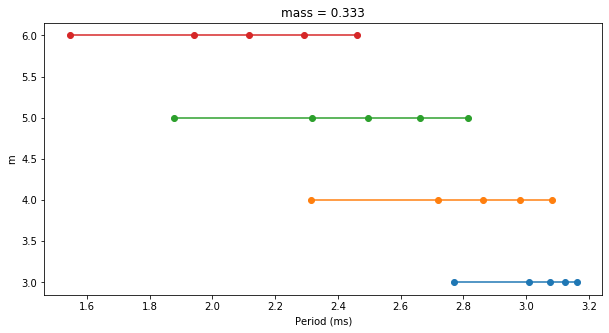

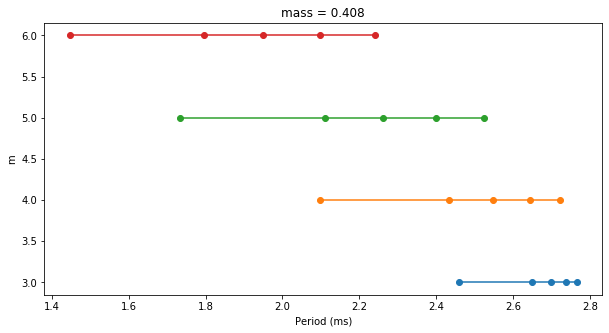

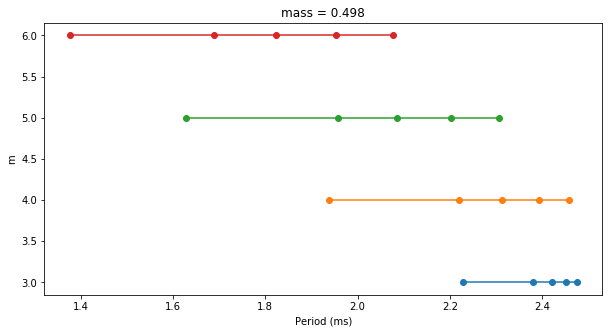

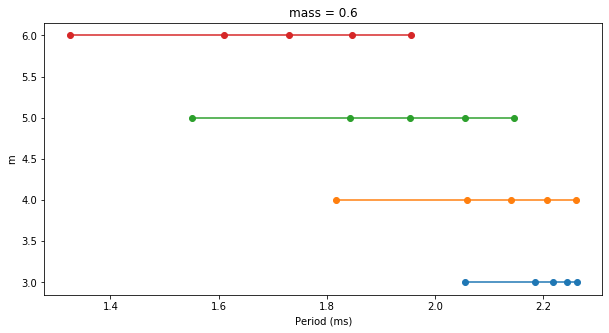

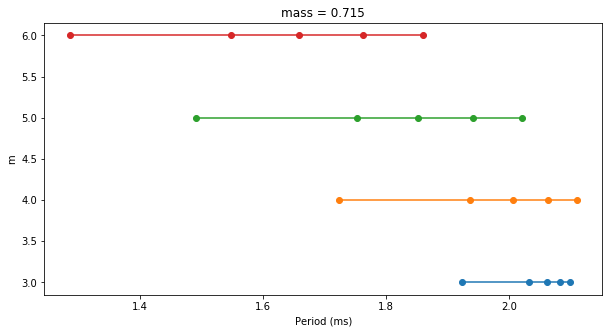

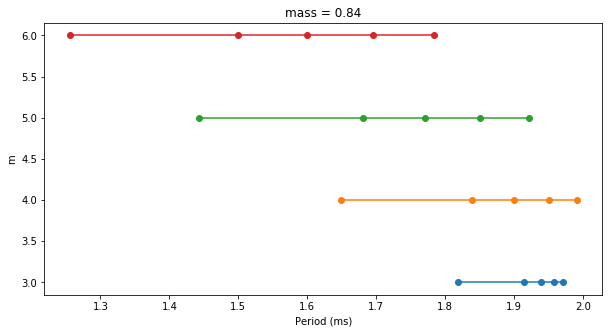

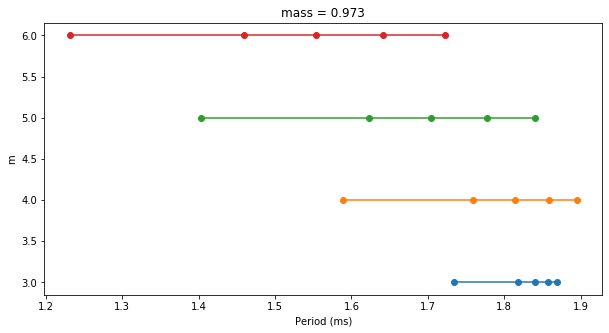

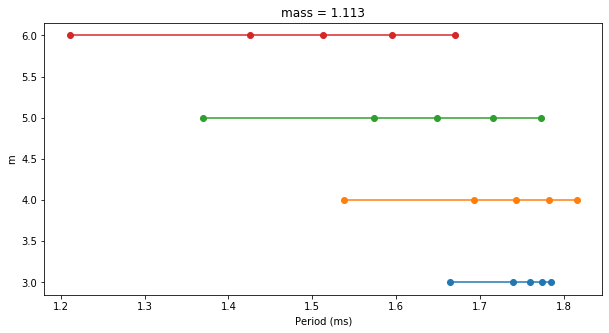

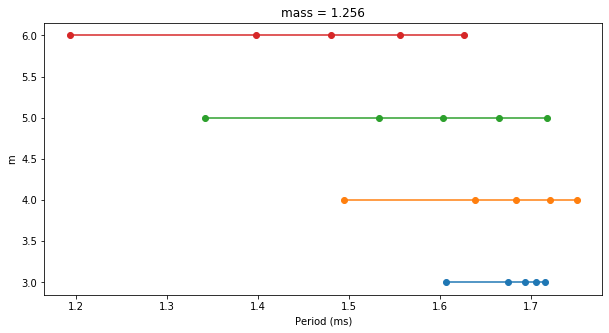

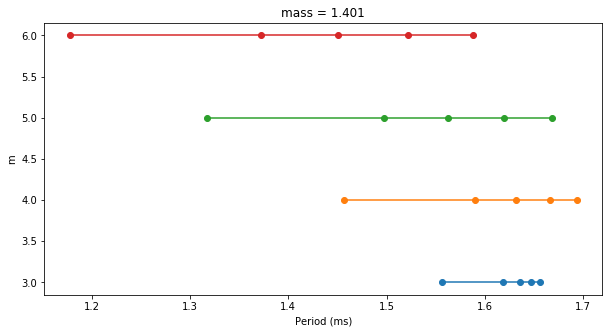

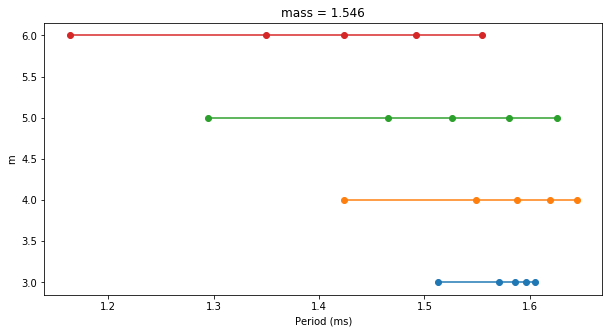

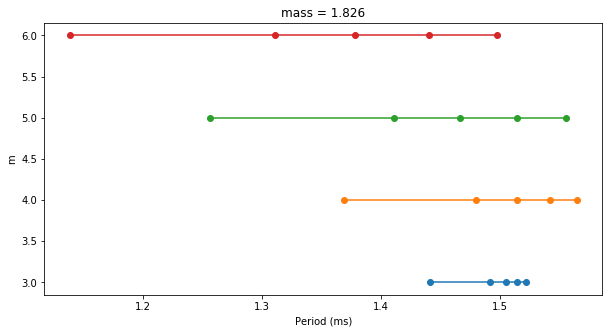

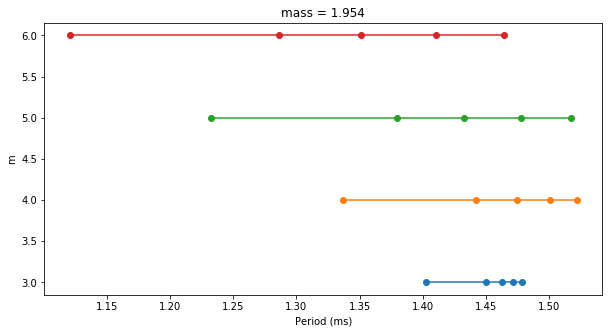

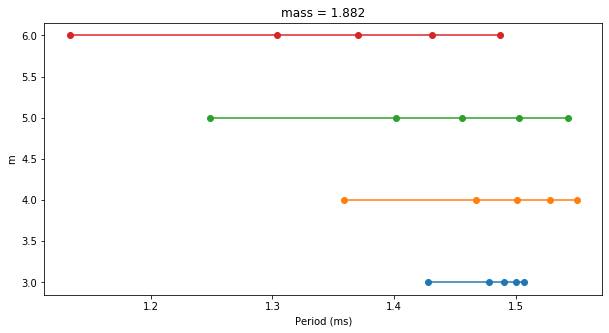

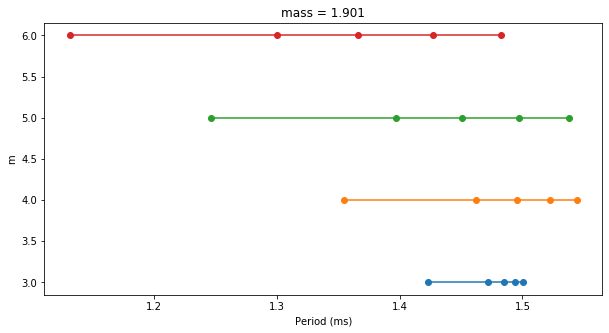

In [14]:
for j in range(15):
    mass = dataHT2['M_gr'][j]
    radius = dataHT2['R_km'][j]
    plt.figure(figsize=(10,5))
    plt.title('mass = %s' %mass)
    for m in range(3,7):
        y = 2*np.pi/Omega_GRR(m,mass,radius,x)*1000
        plt.plot(y,[m,m,m,m,m],'o-')
    plt.xlabel('Period (ms)')
    plt.ylabel('m')
    plt.show()

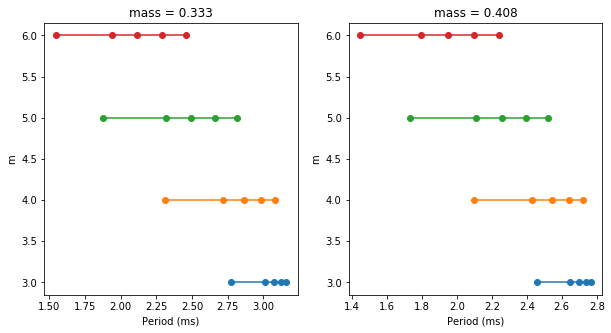

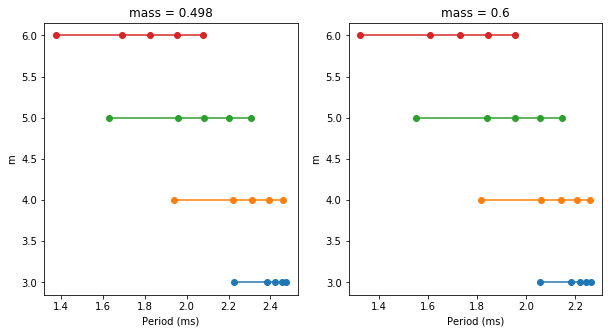

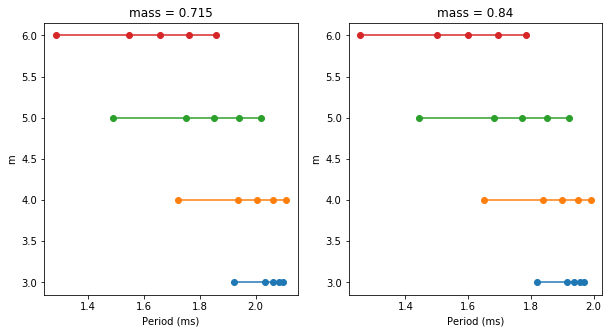

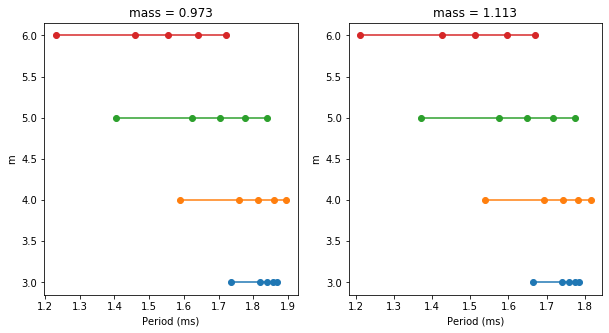

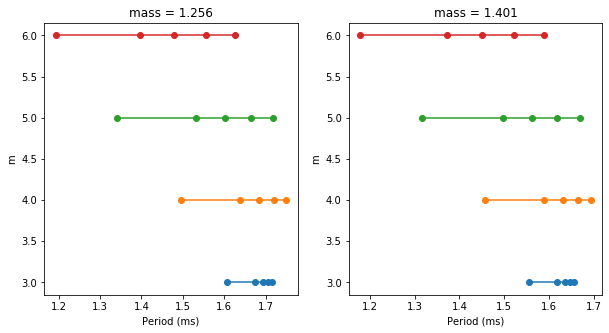

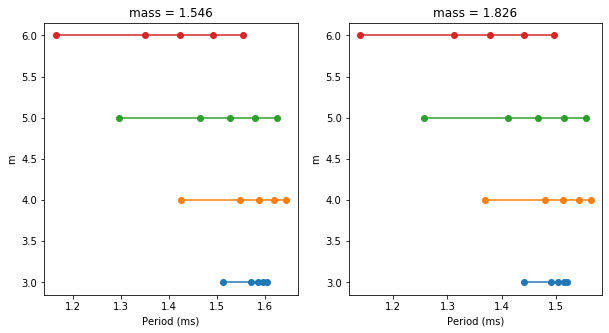

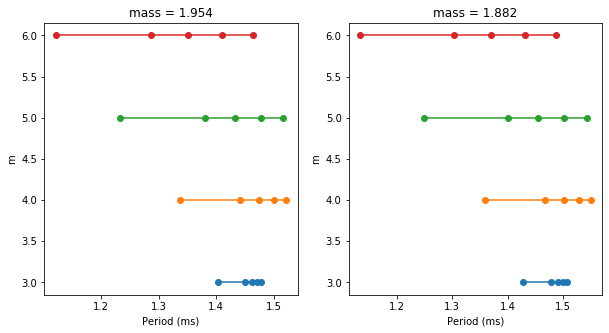

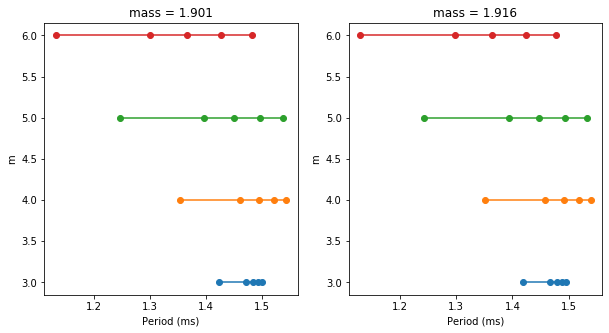

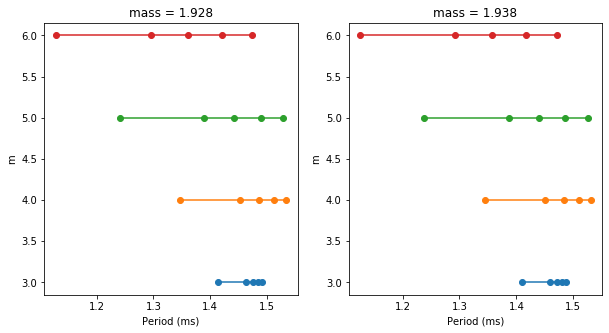

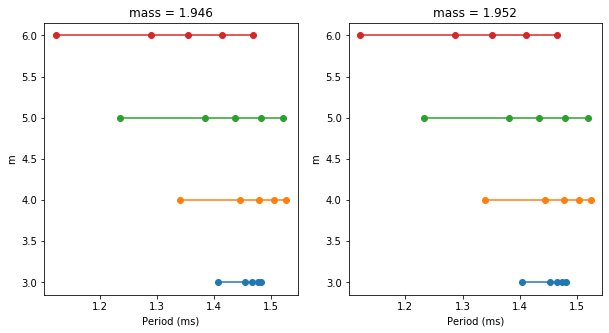

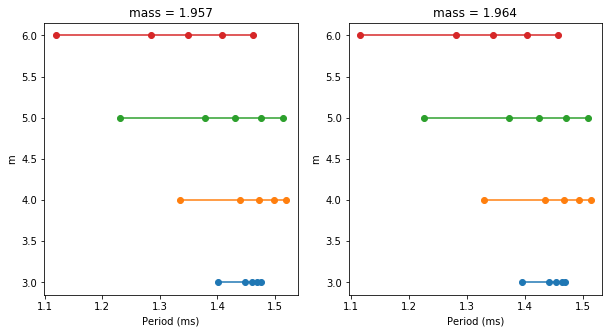

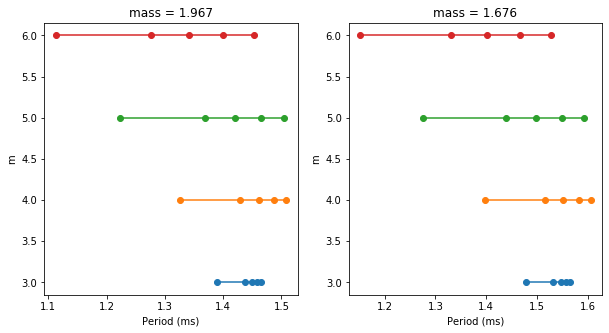

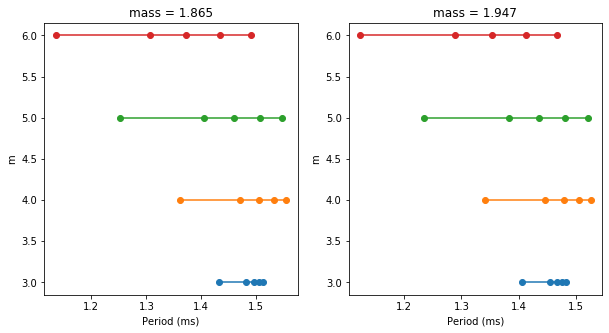

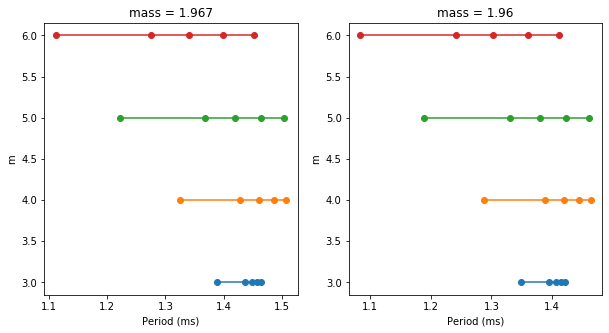

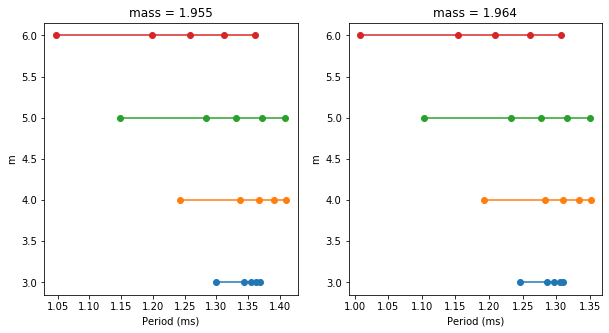

In [19]:
for j in range(15):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    mass = dataHT2['M_gr'][2*j]
    radius = dataHT2['R_km'][2*j]
    plt.title('mass = %s' %mass)
    for m in range(3,7):
        y = 2*np.pi/Omega_GRR(m,mass,radius,x)*1000
        plt.plot(y,[m,m,m,m,m],'o-')
    plt.xlabel('Period (ms)')
    plt.ylabel('m')
    plt.subplot(122)
    mass = dataHT2['M_gr'][2*j+1]
    radius = dataHT2['R_km'][2*j+1]
    plt.title('mass = %s' %mass)
    for m in range(3,7):
        y = 2*np.pi/Omega_GRR(m,mass,radius,x)*1000
        plt.plot(y,[m,m,m,m,m],'o-')
    plt.xlabel('Period (ms)')
    plt.ylabel('m')
    plt.show()

In [ ]:
1.7827*10^12 > g/cm^3

1.6022*10^33 > dyn/cm^2